In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel("1.Excel Exercises.xls", sheetname="Excel Data Test - Raw Data")

The data presented for this portion of the test is on the tab labeled "Excel Data Test - Raw Data" and represents responses from individual tenants in a portfolio. Each row represents one tenant and is assigned a distinct "Tenant ID" number (column A). Each tenant is associated with various demographic factors such as "Property Name," "Regional Director," "Property Type," etc. Each tenant answered a series of questions and rated their satisfaction on a 1-5 scale (1=poor, 5=excellent). The first question answered is "Overall Satisfaction" in column H. There are some questions on a different scale; in those cases, the answers are in text format.									

In [3]:
print('Columns that have no null values:')
[x for x in df.isnull().any()[df.isnull().any()==False].index]

Columns that have no null values:


['Tenant ID #',
 'Property Name',
 'Asset Manager',
 'Property Type',
 'Company Name',
 'Square Footage']

In [4]:
print('Dimensions of the dataset:')
df.shape

Dimensions of the dataset:


(1056, 42)

In [5]:
print('First three rows of the dataset:')
df.head(3)

First three rows of the dataset:


,Tenant ID #,Property Name,Asset Manager,Property Type,Company Name,Square Footage,Lease Expiration,Overall satisfaction,Overall satisfaction with management,Professionalism / courtesy,...,Column spacing,Loading area / docks,Ratio of dock doors to square footage,Truck maneuverability,"""Green"" Importance",Leasing Process Overall Satisfaction,Leasing staff - professionalism / courtesy,Leasing staff - responsiveness,Renewal Decision,Renewal Decision Factor
0,326950,"10, 25, 27 Otis Street",Jonathan Smith,Industrial,Rand Whitney,73710,2009-11-30,5.0,5.0,5.0,...,3.0,4.0,5.0,5.0,Neutral,4.0,4.0,4.0,Probably would,Price
1,326951,"10, 25, 27 Otis Street",Jonathan Smith,Industrial,Maine's Paper,106964,2011-10-31,4.0,4.0,4.0,...,4.0,4.0,4.0,1.0,Neutral,4.0,4.0,4.0,Unsure,Building maintenance
2,326952,"10, 25, 27 Otis Street",Jonathan Smith,Industrial,EXM (Eurobex),19971,2010-09-30,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,Neutral,NaN,NaN,NaN,Unsure,Corporate decision


# "1a. Create a table showing the distribution (percentages) of responses for ""Renewal Intentions"" with four rows (one row for each ""property type"" and a row summarizing all respondents). Include a column for each answer option, as well as one that groups the percentage of tenants who are likely to renew (respondents who selected ""probably would"" or ""definitely would"").

In [6]:
print('Distinct property types:')
[x for x in df['Property Type'].unique()]

Distinct property types:


['Industrial', 'Retail', 'Office']

In [7]:
print('Distinct renewal decisions:')
[x for x in df['Renewal Decision'].unique()]

Distinct renewal decisions:


['Probably would',
 'Unsure',
 'Probably would not',
 nan,
 'Definitely would',
 'Definitely would not']

Here I group by Property Type and Renewal Decision and obtain a count of Tenant ID #'s to get a count of the number of entries.

In [8]:
q1 = df.groupby(['Property Type', 'Renewal Decision'])['Tenant ID #'].agg({'Frequency Counts': 'count'}).reset_index()
q1

,Property Type,Renewal Decision,Frequency Counts
0,Industrial,Definitely would,22
1,Industrial,Definitely would not,9
2,Industrial,Probably would,98
3,Industrial,Probably would not,14
4,Industrial,Unsure,89
5,Office,Definitely would,184
6,Office,Definitely would not,7
7,Office,Probably would,249
8,Office,Probably would not,7
9,Office,Unsure,42


Next I group by Property Type and divide frequency counts by the sum of frequency counts for the property type it belongs to in addition to multiplying by 100.

In [9]:
q1['Percent'] = q1.groupby('Property Type')['Frequency Counts'].apply(lambda x : 100*x/sum(x))
q1

,Property Type,Renewal Decision,Frequency Counts,Percent
0,Industrial,Definitely would,22,9.482759
1,Industrial,Definitely would not,9,3.879310
2,Industrial,Probably would,98,42.241379
3,Industrial,Probably would not,14,6.034483
4,Industrial,Unsure,89,38.362069
5,Office,Definitely would,184,37.627812
6,Office,Definitely would not,7,1.431493
7,Office,Probably would,249,50.920245
8,Office,Probably would not,7,1.431493
9,Office,Unsure,42,8.588957


In [10]:
q1 = q1.pivot(index='Property Type', columns='Renewal Decision', values='Percent')
q1

Renewal Decision,Definitely would,Definitely would not,Probably would,Probably would not,Unsure
Property Type,,,,,
Industrial,9.482759,3.879310,42.241379,6.034483,38.362069
Office,37.627812,1.431493,50.920245,1.431493,8.588957
Retail,21.105528,3.015075,33.668342,9.045226,33.165829


In [11]:
all_types = df.groupby('Renewal Decision')['Tenant ID #'].agg({'Frequency Counts': 'count'}).reset_index()
all_types['Type'] = 'All'
all_types['Percent'] = all_types['Frequency Counts'].divide(all_types['Frequency Counts'].sum())*100
all_types = all_types.pivot(index='Type', columns='Renewal Decision', values='Percent')
q1 = q1.append(all_types)

q1

Renewal Decision,Definitely would,Definitely would not,Probably would,Probably would not,Unsure
Industrial,9.482759,3.879310,42.241379,6.034483,38.362069
Office,37.627812,1.431493,50.920245,1.431493,8.588957
Retail,21.105528,3.015075,33.668342,9.045226,33.165829
All,26.956522,2.391304,45.000000,4.239130,21.413043


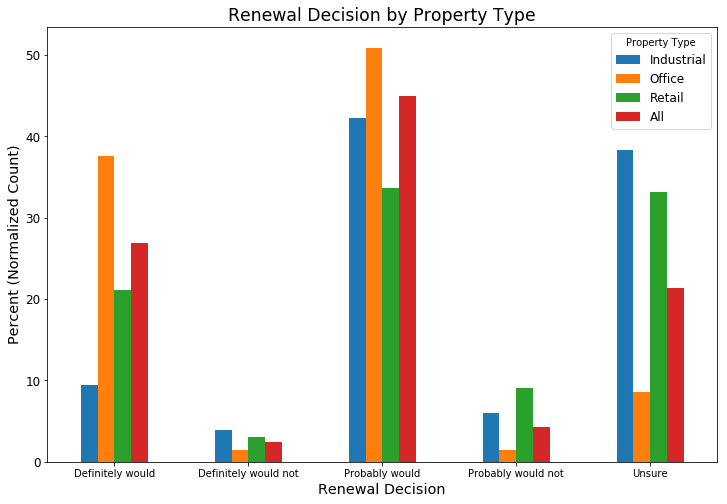

In [12]:
q1.T.plot.bar(figsize=(12,8), fontsize='large')
plt.title('Renewal Decision by Property Type', fontsize='xx-large')
plt.ylabel('Percent (Normalized Count)', fontsize='x-large')
plt.xlabel('Renewal Decision', fontsize='x-large')
plt.legend(title='Property Type', fontsize='large')
plt.xticks(rotation=0, fontsize='medium')
plt.show()

In [13]:
q1['Likely To Renew'] = q1['Definitely would'] + q1['Probably would']
q1

Renewal Decision,Definitely would,Definitely would not,Probably would,Probably would not,Unsure,Likely To Renew
Industrial,9.482759,3.879310,42.241379,6.034483,38.362069,51.724138
Office,37.627812,1.431493,50.920245,1.431493,8.588957,88.548057
Retail,21.105528,3.015075,33.668342,9.045226,33.165829,54.773869
All,26.956522,2.391304,45.000000,4.239130,21.413043,71.956522


# b. What are the three most frequently cited ""Renewal Decision Factors"" for industrial tenants who are ""unsure"" about their renewal decision?

In [14]:
industrial = df[df['Property Type']=='Industrial']

In [15]:
industrial_unsure = industrial[industrial['Renewal Decision']=='Unsure']

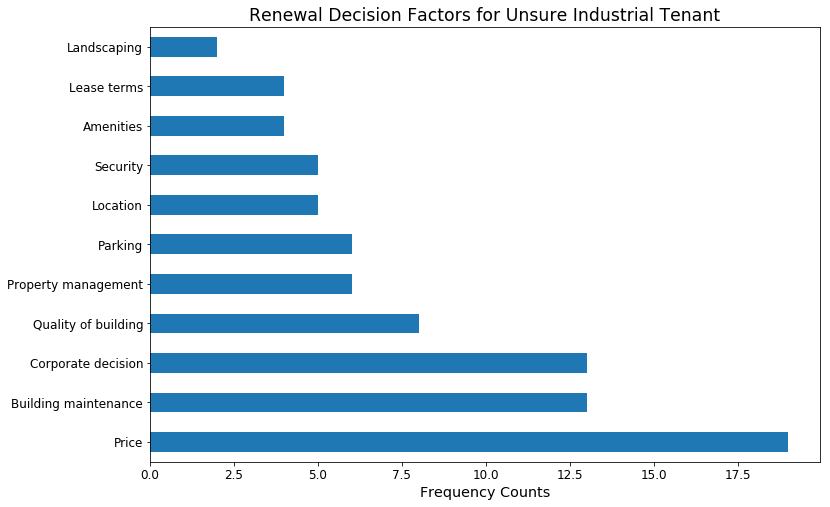

In [16]:
industrial_unsure['Renewal Decision Factor'].value_counts().plot.barh(figsize=(12,8), fontsize='large')
plt.title('Renewal Decision Factors for Unsure Industrial Tenant', fontsize='xx-large')
plt.xlabel('Frequency Counts', fontsize='x-large')
plt.show()

In [17]:
print('The three most frequently cited "Renewal Decision Factors" for Industrial tenants who are "Unsure" about their renewal')
industrial_unsure['Renewal Decision Factor'].value_counts()[:3]

The three most frequently cited "Renewal Decision Factors" for Industrial tenants who are "Unsure" about their renewal


Price                   19
Building maintenance    13
Corporate decision      13
Name: Renewal Decision Factor, dtype: int64

# c. How many office tenants are likely to renew (respondents who selected ""probably would"" or ""definitely would"") and select ""property management"" as the renewal decision factor? What is the total square footage represented by these office tenants?

In [18]:
office = df[df['Property Type']=='Office']
office_likely = office[(office['Renewal Decision'] == 'Probably would') | (office['Renewal Decision'] == 'Definitely would')]

In [19]:
print('The number of office tenants most likely to renew')
office_likely.shape[0]

The number of office tenants most likely to renew


433

In [20]:
print('Those office tenants likely to renew who select property management as the renewal decision factor')
office_likely[office_likely['Renewal Decision Factor']=='Property management'].shape[0]

Those office tenants likely to renew who select property management as the renewal decision factor


78

In [21]:
print('The total square footage represented by these office tenants')
office_likely[office_likely['Renewal Decision Factor']=='Property management']['Square Footage'].sum()

The total square footage represented by these office tenants


827499

# d. How many tenants have a lease expiration in 2010 and are either unlikely to renew (respondents who selected ""probably would not"" or ""definitely would not"") or unsure about their renewal decision?"														

In [22]:
exp = df[df['Lease Expiration'].dt.year==2010]
print('Number of Tenants with lease expiration in 2010: {}'.format(exp.shape[0]))

Number of Tenants with lease expiration in 2010: 177


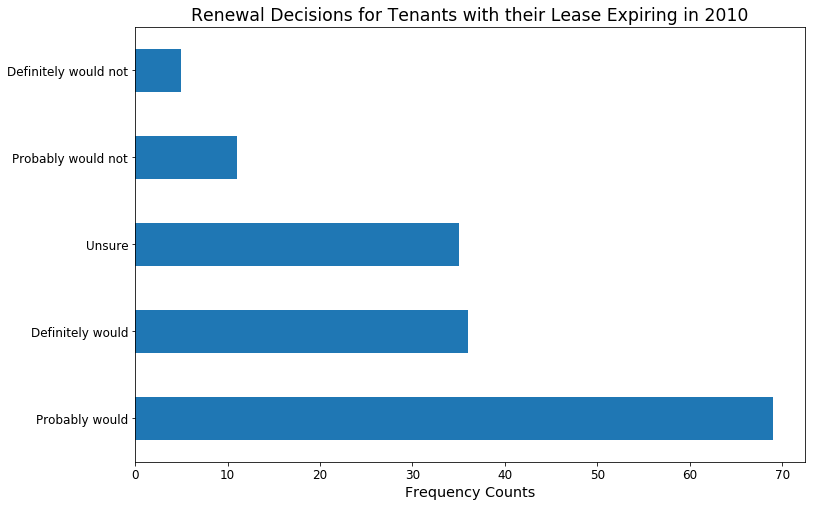

In [23]:
exp['Renewal Decision'].value_counts().plot.barh(figsize=(12,8), fontsize='large')
plt.title('Renewal Decisions for Tenants with their Lease Expiring in 2010', fontsize='xx-large')
plt.xlabel('Frequency Counts', fontsize='x-large')
plt.show()

In [24]:
exp.head()

,Tenant ID #,Property Name,Asset Manager,Property Type,Company Name,Square Footage,Lease Expiration,Overall satisfaction,Overall satisfaction with management,Professionalism / courtesy,...,Column spacing,Loading area / docks,Ratio of dock doors to square footage,Truck maneuverability,"""Green"" Importance",Leasing Process Overall Satisfaction,Leasing staff - professionalism / courtesy,Leasing staff - responsiveness,Renewal Decision,Renewal Decision Factor
2,326952,"10, 25, 27 Otis Street",Jonathan Smith,Industrial,EXM (Eurobex),19971,2010-09-30,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,Neutral,NaN,NaN,NaN,Unsure,Corporate decision
3,326953,"10, 25, 27 Otis Street",Jonathan Smith,Industrial,Ambius,19087,2010-07-31,3.0,2.0,3.0,...,4.0,4.0,4.0,2.0,Important,NaN,NaN,NaN,Unsure,Quality of building
6,281438,10650 Riggs Hill Road,Suzanne Michaels,Industrial,Armstrong Wood Products,61523,2010-07-31,4.0,3.0,3.0,...,5.0,5.0,5.0,5.0,Important,3.0,4.0,3.0,Unsure,Security
10,281216,175 Chastain Meadows Court,Jennifer Fortson,Industrial,"RESPIRONICS, INC",129000,2010-11-30,5.0,5.0,5.0,...,4.0,5.0,5.0,3.0,Very important,NaN,NaN,NaN,Probably would,Quality of building
14,281069,32 Forge Park,Kathy Rodriguez,Industrial,BJ's,142120,2010-01-03,4.0,4.0,5.0,...,4.0,4.0,4.0,4.0,Important,NaN,NaN,NaN,NaN,NaN


In [25]:
result = exp[(exp['Renewal Decision']=='Probably would not') | 
             (exp['Renewal Decision']=='Definitely would not') | 
             (exp['Renewal Decision']=='Unsure')]

In [26]:
print('The number of tenants with expiring leases in 2010 that are unlikely to renew or unsure:')
result.shape[0]

The number of tenants with expiring leases in 2010 that are unlikely to renew or unsure:


51

# "2a. Create a table showing the average scores for ""Overall satisfaction,"" ""Overall satisfaction with management"" and ""Quality of building"" by Asset Manager. Also, include the averages for the entire data set for each of these questions, labeled ""Portfolio Averages."" 

In [27]:
key_columns = ['Overall satisfaction', 'Overall satisfaction with management', 'Quality of building']

In [28]:
names = df['Asset Manager'].unique().tolist()

In [29]:
scores = np.arange(1, 6)

In [30]:
overall_df = pd.DataFrame(0, index=np.arange(1, 6), columns=names)
for name in names:
    col = []
    for score in scores:
        current_manager = df[df['Asset Manager']==name]['Overall satisfaction'].value_counts()
        col.append(current_manager[current_manager.index==score].values[0])
    overall_df[name] = col

overall_management_df = pd.DataFrame(0, index=np.arange(1, 6), columns=names)
for name in names:
    col = []
    for score in scores:
        current_manager = df[df['Asset Manager']==name]['Overall satisfaction with management'].value_counts()
        col.append(current_manager[current_manager.index==score].values[0])
    overall_management_df[name] = col
    
quality_df = pd.DataFrame(0, index=np.arange(1, 6), columns=names)
for name in names:
    col = []
    for score in scores:
        current_manager = df[df['Asset Manager']==name]['Quality of building'].value_counts()
        if current_manager[current_manager.index==score].values.size==0:
            col.append(0)
        else:
            col.append(current_manager[current_manager.index==score].values[0])
    quality_df[name] = col

Now that we have the counts for each asset manager in each category, I will now normalize the data such that the sum of all values for each asset manager is equal to 1.

In [31]:
from sklearn.preprocessing import normalize

Before normalization:

In [32]:
overall_df

,Jonathan Smith,Kathy Rodriguez,Suzanne Michaels,Jennifer Fortson,Peter Kiernon,Fredrick Sanders
1,4,9,9,11,3,2
2,9,14,2,13,12,5
3,35,25,13,35,22,17
4,96,111,60,97,95,72
5,50,71,43,34,47,31


After normalization:

In [33]:
overall_df = pd.DataFrame(normalize(overall_df, 'l1', axis=0)*100, columns=names, index=np.arange(1, 6))
overall_df

,Jonathan Smith,Kathy Rodriguez,Suzanne Michaels,Jennifer Fortson,Peter Kiernon,Fredrick Sanders
1,2.061856,3.913043,7.086614,5.789474,1.675978,1.574803
2,4.639175,6.086957,1.574803,6.842105,6.703911,3.937008
3,18.041237,10.869565,10.236220,18.421053,12.290503,13.385827
4,49.484536,48.260870,47.244094,51.052632,53.072626,56.692913
5,25.773196,30.869565,33.858268,17.894737,26.256983,24.409449


In [34]:
overall_management_df

,Jonathan Smith,Kathy Rodriguez,Suzanne Michaels,Jennifer Fortson,Peter Kiernon,Fredrick Sanders
1,5,6,5,10,3,3
2,7,10,3,14,10,5
3,21,22,13,21,16,12
4,80,80,48,88,79,55
5,76,97,55,47,62,47


In [35]:
overall_management_df = pd.DataFrame(normalize(overall_management_df, 'l1', axis=0)*100, columns=names, index=np.arange(1, 6))
overall_management_df

,Jonathan Smith,Kathy Rodriguez,Suzanne Michaels,Jennifer Fortson,Peter Kiernon,Fredrick Sanders
1,2.645503,2.790698,4.032258,5.555556,1.764706,2.459016
2,3.703704,4.651163,2.419355,7.777778,5.882353,4.098361
3,11.111111,10.232558,10.483871,11.666667,9.411765,9.836066
4,42.328042,37.209302,38.709677,48.888889,46.470588,45.081967
5,40.211640,45.116279,44.354839,26.111111,36.470588,38.524590


In [36]:
quality_df

,Jonathan Smith,Kathy Rodriguez,Suzanne Michaels,Jennifer Fortson,Peter Kiernon,Fredrick Sanders
1,1,3,0,1,2,2
2,10,8,6,2,10,4
3,34,23,26,15,25,29
4,62,76,44,27,83,43
5,33,65,29,19,37,22


In [37]:
quality_df = pd.DataFrame(normalize(quality_df, 'l1', axis=0)*100, columns=names, index=np.arange(1, 6))
quality_df

,Jonathan Smith,Kathy Rodriguez,Suzanne Michaels,Jennifer Fortson,Peter Kiernon,Fredrick Sanders
1,0.714286,1.714286,0.000000,1.5625,1.273885,2.0
2,7.142857,4.571429,5.714286,3.1250,6.369427,4.0
3,24.285714,13.142857,24.761905,23.4375,15.923567,29.0
4,44.285714,43.428571,41.904762,42.1875,52.866242,43.0
5,23.571429,37.142857,27.619048,29.6875,23.566879,22.0


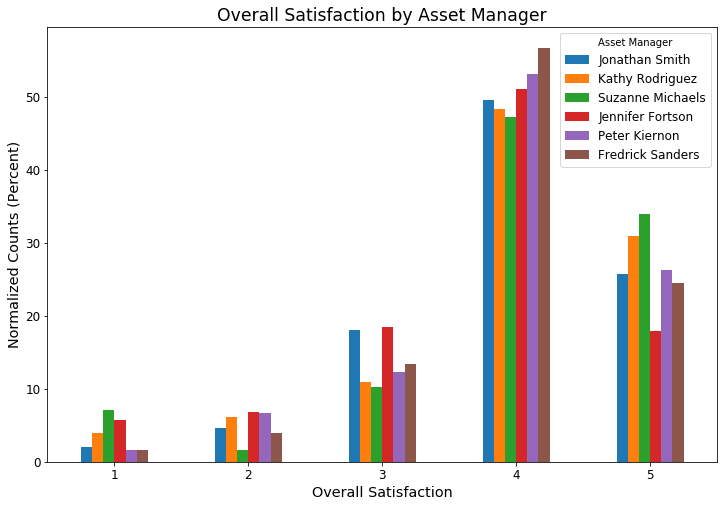

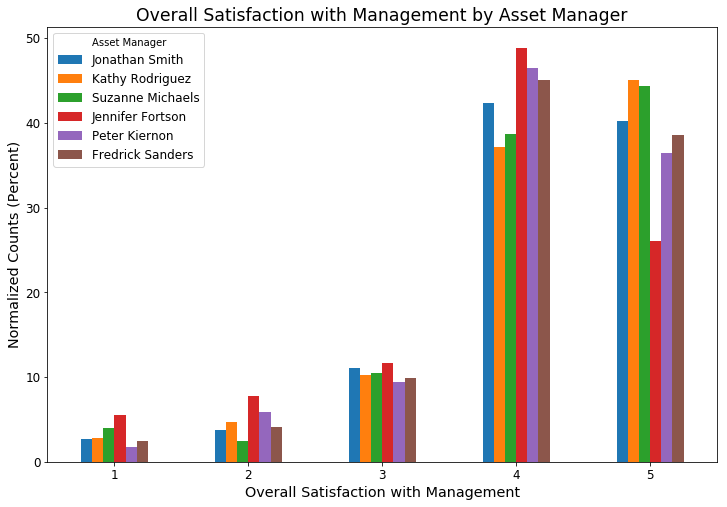

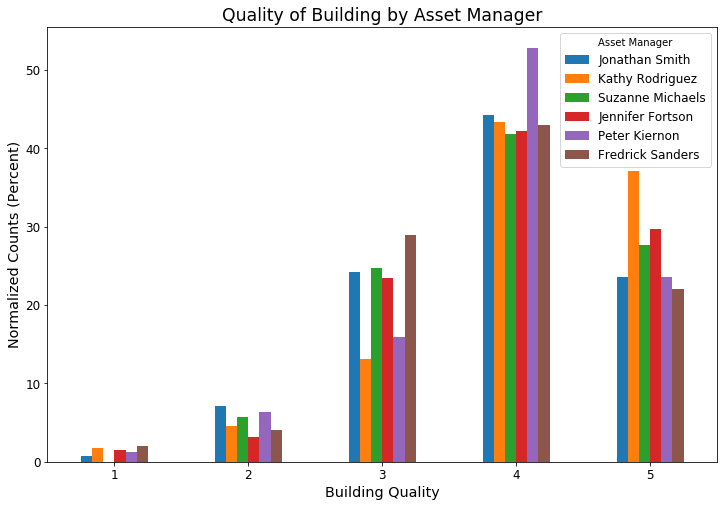

In [38]:
overall_df.plot.bar(figsize=(12,8), fontsize='large')
plt.title('Overall Satisfaction by Asset Manager', fontsize='xx-large')
plt.xlabel('Overall Satisfaction', fontsize='x-large')
plt.ylabel('Normalized Counts (Percent)', fontsize='x-large')
plt.legend(title='Asset Manager', fontsize='large')
plt.xticks(rotation=0)
plt.show()

overall_management_df.plot.bar(figsize=(12,8), fontsize='large')
plt.title('Overall Satisfaction with Management by Asset Manager', fontsize='xx-large')
plt.xlabel('Overall Satisfaction with Management', fontsize='x-large')
plt.ylabel('Normalized Counts (Percent)', fontsize='x-large')
plt.legend(title='Asset Manager', fontsize='large')
plt.xticks(rotation=0)
plt.show()

quality_df.plot.bar(figsize=(12,8), fontsize='large')
plt.title('Quality of Building by Asset Manager', fontsize='xx-large')
plt.xlabel('Building Quality', fontsize='x-large')
plt.ylabel('Normalized Counts (Percent)', fontsize='x-large')
plt.legend(title='Asset Manager', fontsize='large')
plt.xticks(rotation=0)
plt.show()

In [39]:
portfolios = df.groupby('Asset Manager')[key_columns].mean()
portfolios

,Overall satisfaction,Overall satisfaction with management,Quality of building
Asset Manager,,,
Fredrick Sanders,3.984252,4.131148,3.790000
Jennifer Fortson,3.684211,3.822222,3.953125
Jonathan Smith,3.922680,4.137566,3.828571
Kathy Rodriguez,3.960870,4.172093,4.097143
Peter Kiernon,3.955307,4.100000,3.910828
Suzanne Michaels,3.992126,4.169355,3.914286


In [40]:
portfolios = portfolios.append(df[key_columns].mean().rename('Portfolio Averages'), 0)
portfolios

,Overall satisfaction,Overall satisfaction with management,Quality of building
Asset Manager,,,
Fredrick Sanders,3.984252,4.131148,3.790000
Jennifer Fortson,3.684211,3.822222,3.953125
Jonathan Smith,3.922680,4.137566,3.828571
Kathy Rodriguez,3.960870,4.172093,4.097143
Peter Kiernon,3.955307,4.100000,3.910828
Suzanne Michaels,3.992126,4.169355,3.914286
Portfolio Averages,3.909265,4.085000,3.927126


# b. Which Asset Managers have the highest score for each question? 

In [41]:
print('Asset Managers with highest score for each question:')
portfolios.idxmax()

Asset Managers with highest score for each question:


Overall satisfaction                    Suzanne Michaels
Overall satisfaction with management     Kathy Rodriguez
Quality of building                      Kathy Rodriguez
dtype: object

# c. What percentage of Suzanne Michaels' office tenants are ""satisfied"" overall (a 4 or 5 on the 5-point scale)?"	

In [42]:
suzanne = df[df['Asset Manager']=='Suzanne Michaels']

In [43]:
satisfied_by_suzanne = suzanne[(suzanne['Overall satisfaction'] == 4) | (suzanne['Overall satisfaction'] == 5)]

In [44]:
print("Percent of Suzanne Michaels' office tennats that are satisfied overall:")
satisfied_by_suzanne.shape[0] / suzanne.shape[0] * 100

Percent of Suzanne Michaels' office tennats that are satisfied overall:


81.10236220472441

# "For parts a and b, only include tenants who answered both the ""current"" and ""preferred"" contact questions.

In [45]:
contact_columns = ['Current Proactive Contact', 'Preferred Proactive Contact']

In [46]:
print('Removing entries that have a null value in at least one of the columns in question.')
answered_both = df[df[contact_columns].notnull().any(1)]

Removing entries that have a null value in at least one of the columns in question.


In [47]:
print('Unique values for Current Proactive Contact')
[x for x in answered_both['Current Proactive Contact'].unique()]

Unique values for Current Proactive Contact


['1 / month', '1 / quarter', 'Never', '1 / week', '2x / year']

In [48]:
print('Unique values for Preferred Proactive Contact')
[x for x in answered_both['Preferred Proactive Contact'].unique()]

Unique values for Preferred Proactive Contact


['1 / month', '1 / quarter', '1 / week', '2x / year']

In [49]:
answered_both[contact_columns].head(3)

,Current Proactive Contact,Preferred Proactive Contact
0,1 / month,1 / month
1,1 / quarter,1 / quarter
2,Never,1 / quarter


Since the values in these two columns are categorical, I decided to use a contact dictionary to map the contact frequencies to numeric values to make comparisons between them easy. The inverse contact dictionary is to change the values back to normal.

In [50]:
contact_dict = {'Never':0,
               '2x / year':1,
               '1 / quarter':2,
               '1 / month':3,
               '1 / week':4}

inv_contact_dict = {v: k for k, v in contact_dict.items()}

pd.options.mode.chained_assignment = None

In [51]:
answered_both[contact_columns] = answered_both[contact_columns].replace(contact_dict)

In [52]:
answered_both[contact_columns].head(3)

,Current Proactive Contact,Preferred Proactive Contact
0,3,3
1,2,2
2,0,2


# 3a. Provide a list of tenants who indicate they ""prefer"" to be contacted more frequently than they ""currently"" are. In that list, include columns for both their ""current"" and ""preferred"" levels of contact as well as their ""property type,"" lease expiration date and square footage. 

Now with the values mapped to numerics, it is possible to find tenants who prefer to be contacted more frequently than currently.

In [53]:
more_frequently = answered_both[answered_both['Preferred Proactive Contact'] > answered_both['Current Proactive Contact']]

In [54]:
more_frequently[contact_columns].head()

,Current Proactive Contact,Preferred Proactive Contact
2,0,2
3,0,2
7,0,2
15,3,4
17,1,2


In [55]:
more_frequently[contact_columns] = more_frequently[contact_columns].replace(inv_contact_dict)
more_frequently[contact_columns].head()

,Current Proactive Contact,Preferred Proactive Contact
2,Never,1 / quarter
3,Never,1 / quarter
7,Never,1 / quarter
15,1 / month,1 / week
17,2x / year,1 / quarter


In [56]:
more_frequently[['Tenant ID #', 'Property Type', 'Lease Expiration', 'Square Footage', 'Current Proactive Contact', 'Preferred Proactive Contact']].head()

,Tenant ID #,Property Type,Lease Expiration,Square Footage,Current Proactive Contact,Preferred Proactive Contact
2,326952,Industrial,2010-09-30,19971,Never,1 / quarter
3,326953,Industrial,2010-07-31,19087,Never,1 / quarter
7,290437,Industrial,NaT,110502,Never,1 / quarter
15,281441,Industrial,2014-06-30,167106,1 / month,1 / week
17,281443,Industrial,2010-10-31,83000,2x / year,1 / quarter


In [57]:
# Actual number of rows
print('The number of tenants who prefer to be contacted more frequently: {}'.format(more_frequently.shape[0]))

The number of tenants who prefer to be contacted more frequently: 363


# b. For each property type, what percentage of tenants ""prefer"" to be contacted more frequently than they ""currently"" are? 			

In [58]:
print('Total counts of all tenants by property types:')
df['Property Type'].value_counts()

Total counts of all tenants by property types:


Office        544
Industrial    263
Retail        249
Name: Property Type, dtype: int64

In [59]:
print('Tenants by property type who wish to be contacted more frequently:')
more_frequently['Property Type'].value_counts()

Tenants by property type who wish to be contacted more frequently:


Office        166
Retail        102
Industrial     95
Name: Property Type, dtype: int64

In [60]:
print('Percent of tenants by property type who prefer to be contacted more frequently than they are currently:')
more_frequently['Property Type'].value_counts()/df['Property Type'].value_counts()*100

Percent of tenants by property type who prefer to be contacted more frequently than they are currently:


Industrial    36.121673
Office        30.514706
Retail        40.963855
Name: Property Type, dtype: float64

# c. What is the count of industrial tenants who ""prefer"" to be contacted at least once a quarter (i.e., quarterly or more frequently)? 

In [61]:
[x for x in df['Preferred Proactive Contact'].unique()]

['1 / month', '1 / quarter', '1 / week', '2x / year', nan]

In [62]:
ind_q_and_more = industrial[(industrial['Preferred Proactive Contact']=='1 / quarter') | 
                            (industrial['Preferred Proactive Contact']=='1 / month') |
                            (industrial['Preferred Proactive Contact']=='1 / week')]

In [63]:
print('The count of industrial tenants who prefer to be contacted at least once a quarter:')
ind_q_and_more.shape[0]

The count of industrial tenants who prefer to be contacted at least once a quarter:


200

# d. What percentage of retail square footage is represented by tenants who ""prefer"" to be contacted exactly once a week?"								

In [64]:
print('Total square footage in retail:')
df[df['Property Type']=='Retail']['Square Footage'].sum()

Total square footage in retail:


1672074

In [65]:
retail = df[df['Property Type']=='Retail']

In [66]:
retail_week = retail[retail['Preferred Proactive Contact']=='1 / week']
retail_week[['Tenant ID #', 'Property Type', 'Preferred Proactive Contact', 'Current Proactive Contact']]

,Tenant ID #,Property Type,Preferred Proactive Contact,Current Proactive Contact
104,282944,Retail,1 / week,1 / month
299,282748,Retail,1 / week,Never
381,282314,Retail,1 / week,Never
391,282345,Retail,1 / week,Never
410,282550,Retail,1 / week,1 / week
468,282601,Retail,1 / week,1 / week


In [67]:
print('Percent of retail square footage represented by tenants who prefer to be contacted exactly once a week:')
retail_week['Square Footage'].sum() / df[df['Property Type']=='Retail']['Square Footage'].sum() * 100

Percent of retail square footage represented by tenants who prefer to be contacted exactly once a week:


2.1475724160533565

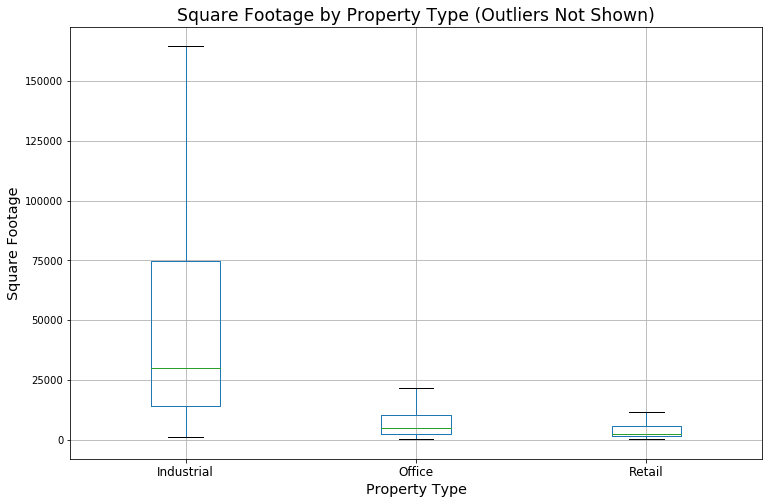

In [68]:
df.boxplot(column='Square Footage', by='Property Type', figsize=(12,8), showfliers=False)
plt.title('Square Footage by Property Type (Outliers Not Shown)', fontsize='xx-large')
plt.suptitle('')
plt.ylabel('Square Footage', fontsize='x-large')
plt.xlabel('Property Type', fontsize='x-large')
plt.xticks(fontsize='large')
plt.show()